In [1]:
import sys
sys.path.append('..//')

cap method area sum 3.5738507231636465
expected area sum 3.5738661731158983
n_dipoles 1
n_rays 253
initial energy shape ()


<IPython.core.display.Javascript object>


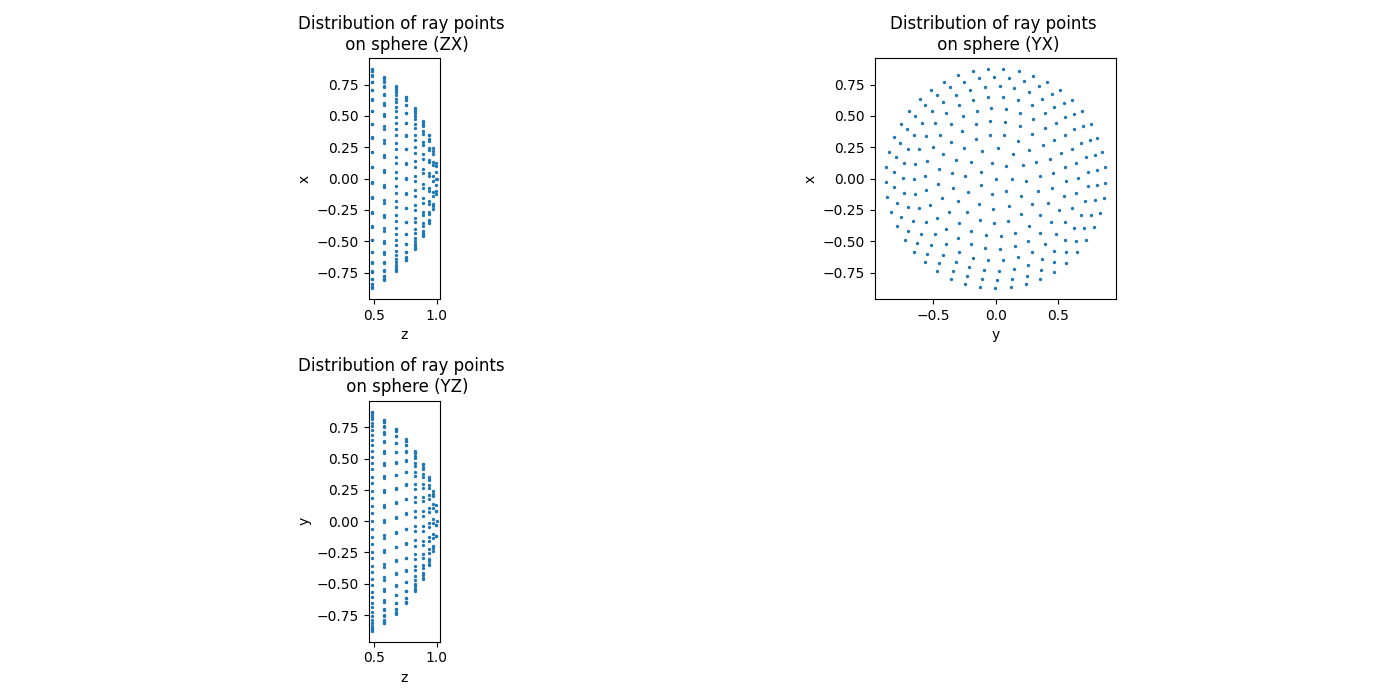

initialisation time in system 0.240978s
Flat pupil
CURVED REFRACTION
FLAT REFRACTION
CURVED REFRACTION
Saved checkpoint with 10000 rays
FLAT REFRACTION


C:\Users\lnr19\code\OPMsim\notebooks\..\opmsim\optical_elements.py:433: RuntimeWarning: invalid value encountered in divide
  z_dist = abs(rho_0/np.tan(rays.theta))
C:\Users\lnr19\code\OPMsim\notebooks\..\opmsim\optical_elements.py:435: RuntimeWarning: invalid value encountered in divide
  dist_r = abs(rho_0/np.sin(rays.theta))


<IPython.core.display.Javascript object>


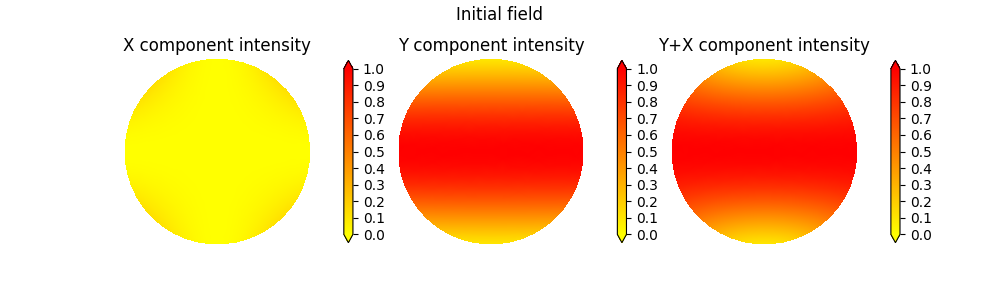

0.0
Ep_ps shape (1, 253, 3, 1)


<IPython.core.display.Javascript object>


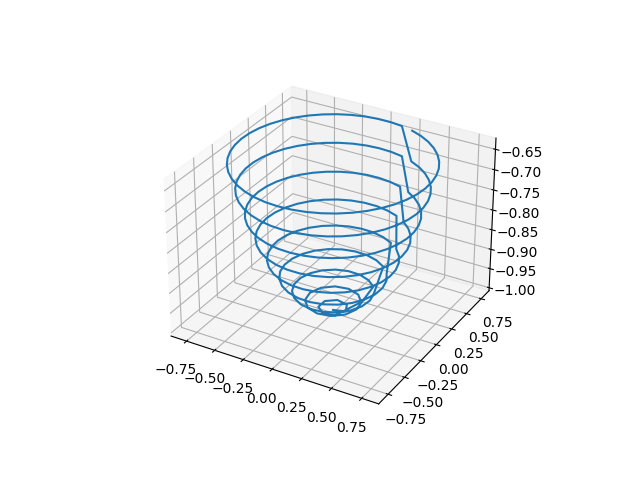

<IPython.core.display.Javascript object>


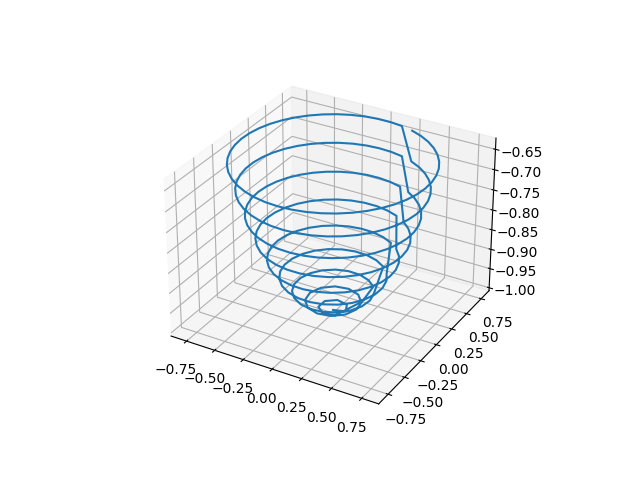

Ep_xyz.shape (1, 253, 3, 1)
Ep_r_dot (should be 1) [ 0.         -1.         -1.          1.          1.          1.
  1.          0.22252093 -1.         -1.         -1.          1.
  1.          1.          1.          1.          1.          0.6234898
 -0.36534102 -0.98883083 -1.         -1.         -1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          0.82845006  0.30976573 -0.33955269
 -0.8456753  -1.         -1.         -1.         -1.         -1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  0.98364719  0.7618104   0.33584714 -0.1801061  -0.64780005 -0.9419165
 -1.         -1.         -1.         -1.         -1.         -1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          0.99172516  0.85376951  0.56818935
  0.18436

C:\Users\lnr19\code\OPMsim\notebooks\..\opmsim\optical_elements.py:630: RuntimeWarning: divide by zero encountered in divide
  x_over_y = rays.k_vec[:,0,:]/rays.k_vec[:,1,:]
C:\Users\lnr19\code\OPMsim\notebooks\..\opmsim\optical_elements.py:630: RuntimeWarning: invalid value encountered in divide
  x_over_y = rays.k_vec[:,0,:]/rays.k_vec[:,1,:]
C:\Users\lnr19\code\OPMsim\notebooks\..\opmsim\optical_elements.py:631: RuntimeWarning: divide by zero encountered in divide
  print("k_vec x/y", rays.k_vec[:,0,:]/rays.k_vec[:,1,:])
C:\Users\lnr19\code\OPMsim\notebooks\..\opmsim\optical_elements.py:631: RuntimeWarning: invalid value encountered in divide
  print("k_vec x/y", rays.k_vec[:,0,:]/rays.k_vec[:,1,:])


<IPython.core.display.Javascript object>


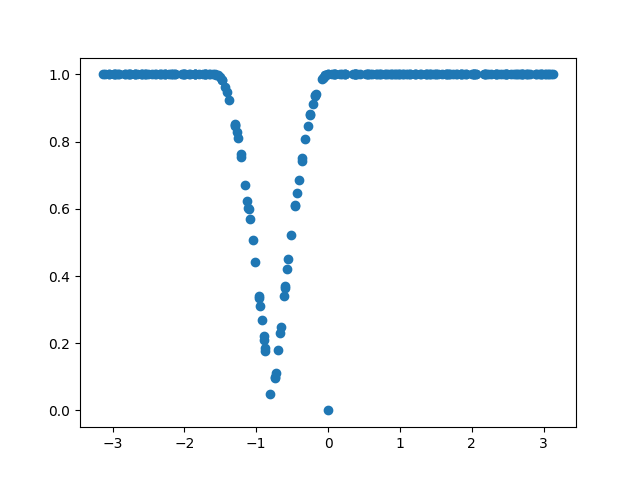

<IPython.core.display.Javascript object>


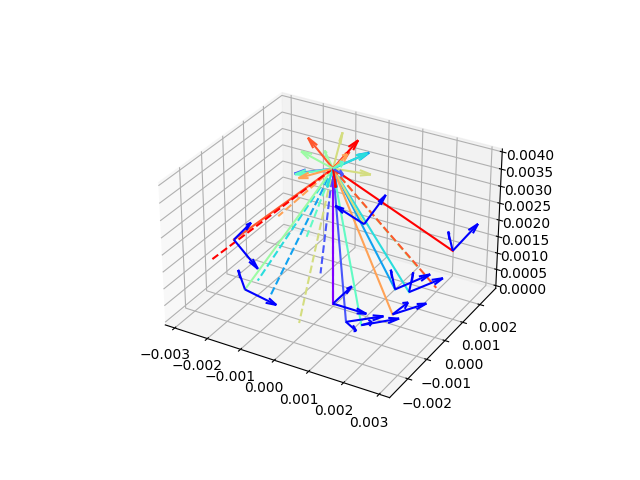

Saved checkpoint with 10000 rays
CURVED REFRACTION
FLAT REFRACTION
CURVED REFRACTION
Saved checkpoint with 10000 rays
kz are negative!


<IPython.core.display.Javascript object>


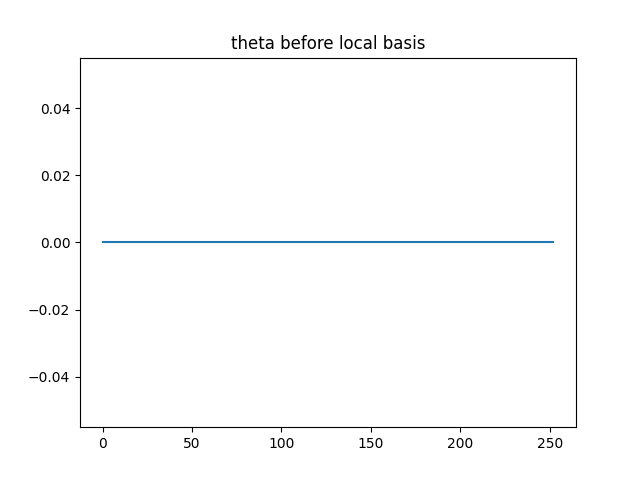

Energy ratio (efficiency): 1.0
Total energy: 195.10611432358868
Total energy per dipole: 195.10611432358868
Iy Ix ratio = 57.242561735413375
maxr 0.016
0 escaped out of 253


<IPython.core.display.Javascript object>


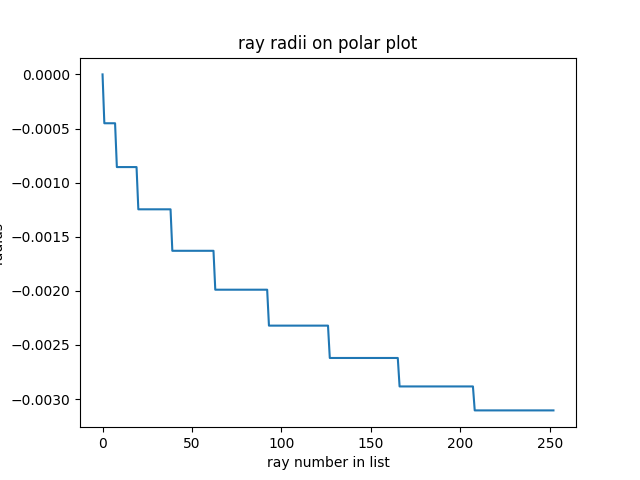

Saved checkpoint with 10000 rays


<IPython.core.display.Javascript object>


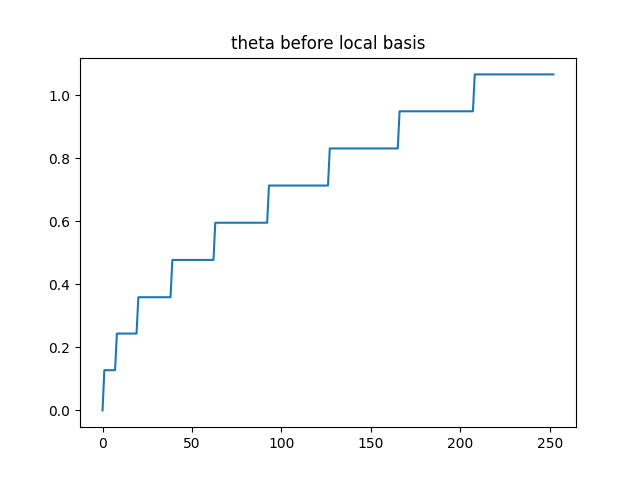

0 escaped out of 253


<IPython.core.display.Javascript object>


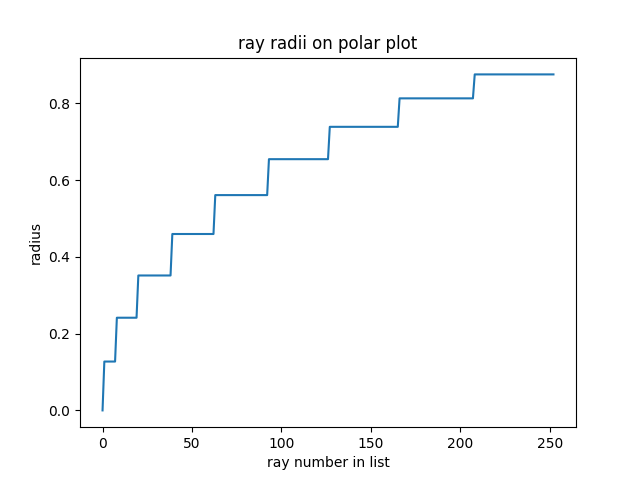

time in trace_rays 0.997523s
ray count 253
scale range in _plot_unstructured None
min for scale 0.0
max for scale 2.0675680296549377
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.003105018820212104


<IPython.core.display.Javascript object>


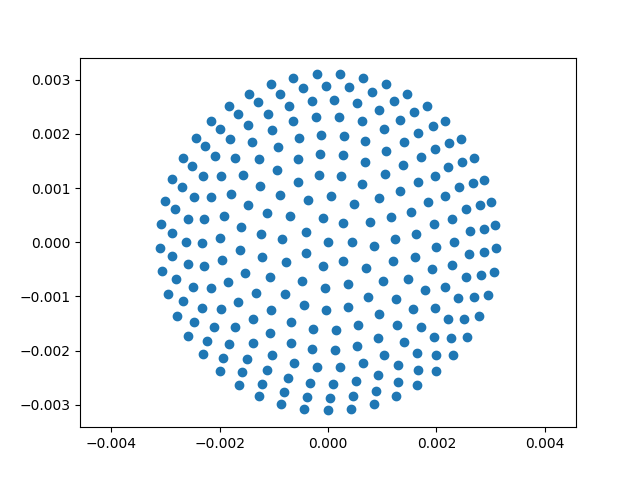

<IPython.core.display.Javascript object>


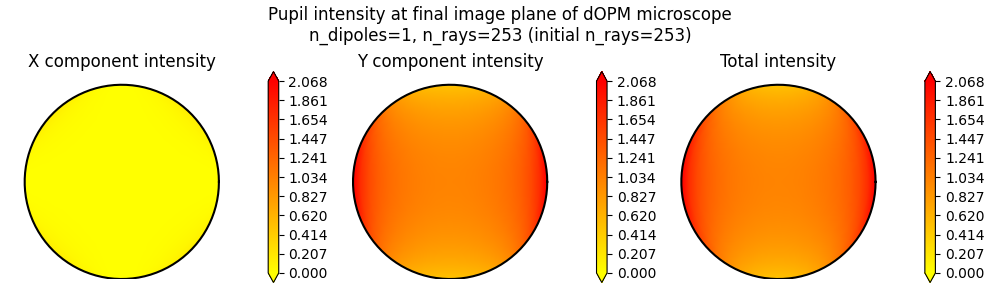

In [2]:
from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt
import sys
%matplotlib notebook

np.set_printoptions(threshold=sys.maxsize)
dipole_count = 50

options = {
    'ray_count': 400,
    'draw_rays': False,
    'max_rays_stored': 10000
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True,
    'max_r_in': 0
}

opm_angle = 0*np.pi/180

O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=0.1, focal_length=0.180, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1)
O2_mirr = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1, update_history=True)#,trace_after=False)

TL2 = optical_elements.SineLens(NA=0.1, focal_length=0.160, n=1)
O3 = optical_elements.SineLens(1.2, focal_length=0.180/60, n=1.33)
TL3 = optical_elements.SineLens(NA=0.1, focal_length=0.162, n=1)

AgSiO2_mirror = optical_elements.FlatMirror(opm_angle, 158e-9, perfect_mirror=True,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")

elements = [O2, O2_mirr, AgSiO2_mirror]#, O2_mirr]

#elements = [O1, TL1, TL2, O2_mirr, AgSiO2_mirror]#, O2_mirr]
elements = [O1, TL1, TL2, O2_mirr, AgSiO2_mirror, O2_mirr, TL2, TL2]


# PerfectRightAngleMirror
source = dipole_source.DipoleSource()
source.add_dipoles((0,0))
#source.generate_dipoles(dipole_count)
#source.classical_photoselection((0,0))

system = OpticalSystem("mirror test system", elements, source, options)

system.trace()

system.plot_pupil(plot_options)

In [ ]:
from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt
import sys
# %matplotlib widget

np.set_printoptions(threshold=sys.maxsize)
dipole_count = 100

options = {
    'ray_count': 100
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True
}

opm_angle = 45*np.pi/180

O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=1, focal_length=0.180, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1)
TL2 = optical_elements.SineLens(NA=1, focal_length=0.160, n=1)
O3 = optical_elements.SineLens(1.2, focal_length=0.180/60, n=1.33)
TL3 = optical_elements.SineLens(NA=1, focal_length=0.162, n=1)

AgSiO2_mirror = optical_elements.FlatMirror(opm_angle, 158e-6,\
    "../refractive_index_data/SiO2.txt", "../refractive_index_data/Ag.txt")

HWP1 = optical_elements.WavePlate(0, np.pi)  # into PBS
HWP2 = optical_elements.WavePlate(np.pi/2, np.pi)  # reflected out of PBS
QWP = optical_elements.WavePlate(np.pi/4, np.pi/2)

elements = [O1, TL1, TL2, O2, HWP1, QWP, AgSiO2_mirror, O2, QWP, HWP2, TL2]

source = dipole_source.DipoleSource()
source.generate_dipoles(dipole_count)
source.classical_photoselection((0,0))

system = OpticalSystem("dOPM system", elements, source, options)

system.trace()

system.plot_pupil(plot_options)




In [ ]:
import optical_matrices

r_p, r_s = optical_matrices.compute_fresnel_protected_mirror(theta_i, n_film_complex, film_thickness, n_metal_complex, wavelength)
